### Importing Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import forecast as f
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm

### Extract Data from Excel

In [2]:
df=(pd.read_excel("wind_turbine_failure.xlsx"))
df.head()

,GeneratorTemp,Nacelle Position,Ambient Air temp,TimeStamp,Failure
0,110.870459,271.821074,42.195686,2016-02-10 12:00:00.000000,1
1,144.095916,273.143590,-5.555016,2016-02-10 13:00:00.000003,1
2,52.859520,159.083729,37.332172,2016-02-10 13:59:59.999997,0
3,49.991123,75.420142,-18.382187,2016-02-10 15:00:00.000000,0
4,32.571176,139.564347,26.285718,2016-02-10 16:00:00.000003,0


In [3]:
df = df.replace('?', np.nan)
df.isnull().sum()

GeneratorTemp       0
Nacelle Position    0
Ambient Air temp    0
TimeStamp           0
Failure             0
dtype: int64

In [4]:
df['TimeStamp'] = df['TimeStamp'].astype('datetime64[s]')
df['TimeStamp']

0      2016-02-10 12:00:00
1      2016-02-10 13:00:00
2      2016-02-10 13:59:59
3      2016-02-10 15:00:00
4      2016-02-10 16:00:00
               ...        
3995   2016-07-25 22:59:59
3996   2016-07-26 00:00:00
3997   2016-07-26 01:00:00
3998   2016-07-26 01:59:59
3999   2016-07-26 03:00:00
Name: TimeStamp, Length: 4000, dtype: datetime64[ns]

In [5]:
#Setting timestamp as index.
df = df.set_index('TimeStamp')
df.head()

,GeneratorTemp,Nacelle Position,Ambient Air temp,Failure
TimeStamp,,,,
2016-02-10 12:00:00,110.870459,271.821074,42.195686,1
2016-02-10 13:00:00,144.095916,273.143590,-5.555016,1
2016-02-10 13:59:59,52.859520,159.083729,37.332172,0
2016-02-10 15:00:00,49.991123,75.420142,-18.382187,0
2016-02-10 16:00:00,32.571176,139.564347,26.285718,0


In [6]:
df = df.drop(['Failure'],axis=1)
df.tail()

,GeneratorTemp,Nacelle Position,Ambient Air temp
TimeStamp,,,
2016-07-25 22:59:59,39.067946,104.331789,-25.999097
2016-07-26 00:00:00,64.953064,8.848718,9.364157
2016-07-26 01:00:00,90.735065,5.754338,23.847924
2016-07-26 01:59:59,106.348092,334.841735,45.689256
2016-07-26 03:00:00,95.410141,216.899726,4.853189


### Converting Data into Day wise

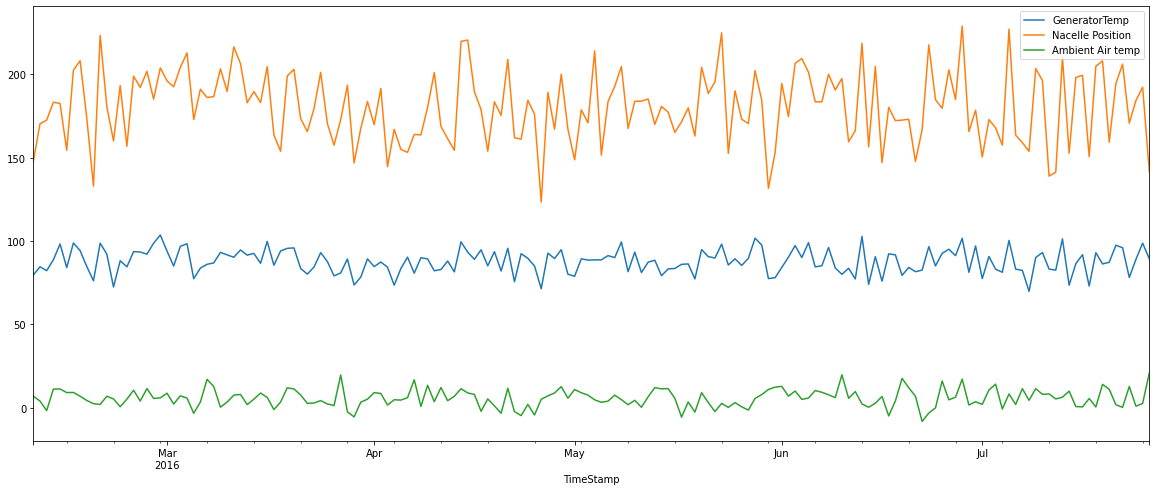

In [7]:
df = df.resample('D').mean()
df.plot(figsize=(20,8))
plt.show()

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 168 entries, 2016-02-10 to 2016-07-26
Freq: D
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   GeneratorTemp     168 non-null    float64
 1   Nacelle Position  168 non-null    float64
 2   Ambient Air temp  168 non-null    float64
dtypes: float64(3)
memory usage: 5.2 KB


In [9]:
df['Failure']=df['GeneratorTemp'].apply(lambda x: 1 if x >= 95 or x <= 1 else 0)

In [10]:
df.to_csv('Final_file.csv', index=False) 

### Plotting Generator Temp vs Failure

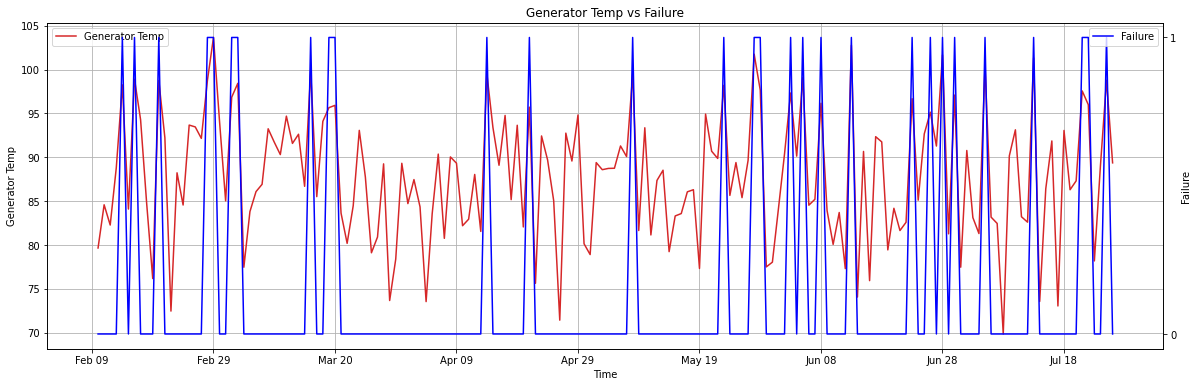

In [34]:
from matplotlib.dates import DateFormatter, DayLocator

fig, ax = plt.subplots(figsize=(20, 6))
axb = ax.twinx()

# Same as above
ax.set_xlabel('Time')
ax.set_ylabel('Generator Temp')
ax.set_title('Generator Temp vs Failure')
ax.grid(True)

# Plotting on the first y-axis
ax.plot(df.index, df.GeneratorTemp, color='tab:red', label='Generator Temp')
ax.legend(loc='upper left');

# Plotting on the second y-axis
axb.set_ylabel('Failure')
axb.plot(df.index, df.Failure, color='blue', label='Failure')
axb.legend(loc='upper right');

ax.xaxis.set_major_locator(DayLocator())
ax.xaxis.set_major_formatter(DateFormatter('%b %d'))

#for tick in ax.get_xticklabels():
#    tick.set_rotation(45)

ax.xaxis.set_major_locator(plt.MaxNLocator(10))
axb.yaxis.set_major_locator(plt.MaxNLocator(1))

`We can see that Turbine gets failed if the Generator temperature is greater than 95`

### Plotting Nacelle Position vs Failure

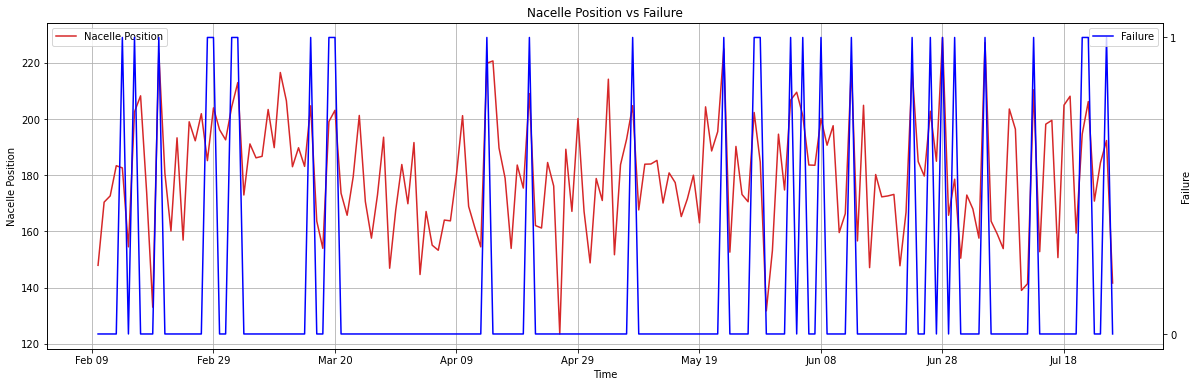

In [35]:
from matplotlib.dates import DateFormatter, DayLocator

fig, ax = plt.subplots(figsize=(20, 6))
axb = ax.twinx()

# Same as above
ax.set_xlabel('Time')
ax.set_ylabel('Nacelle Position')
ax.set_title('Nacelle Position vs Failure')
ax.grid(True)

# Plotting on the first y-axis
ax.plot(df.index, df['Nacelle Position'], color='tab:red', label='Nacelle Position')
ax.legend(loc='upper left');

# Plotting on the second y-axis
axb.set_ylabel('Failure')
axb.plot(df.index, df.Failure, color='blue', label='Failure')
axb.legend(loc='upper right');

ax.xaxis.set_major_locator(DayLocator())
ax.xaxis.set_major_formatter(DateFormatter('%b %d'))

ax.xaxis.set_major_locator(plt.MaxNLocator(10))
axb.yaxis.set_major_locator(plt.MaxNLocator(1))

`We can see that Turbine gets failed if the Nacelle Position is greater than 200`

### Plotting Ambient Air temp vs Failure

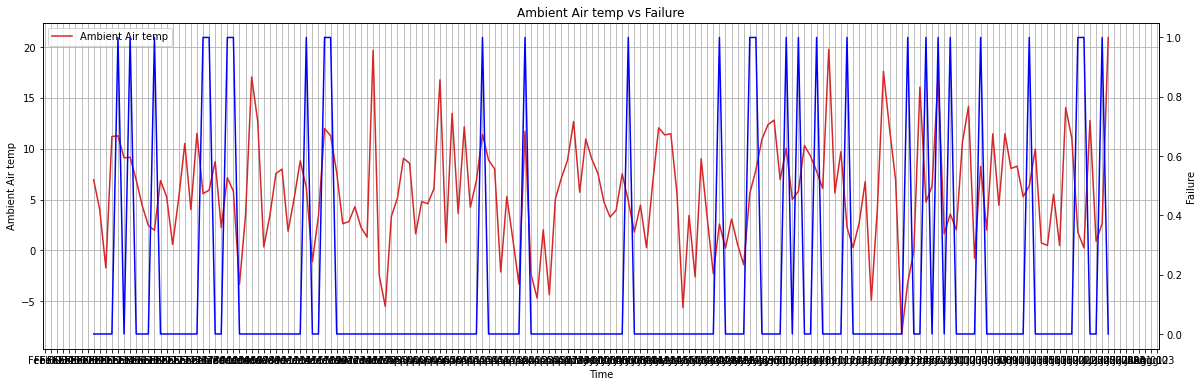

In [13]:
from matplotlib.dates import DateFormatter, DayLocator

fig, ax = plt.subplots(figsize=(20, 6))
axb = ax.twinx()

# Same as above
ax.set_xlabel('Time')
ax.set_ylabel('Ambient Air temp')
ax.set_title('Ambient Air temp vs Failure')
ax.grid(True)

# Plotting on the first y-axis
ax.plot(df.index, df['Ambient Air temp'], color='tab:red', label='Ambient Air temp')
ax.legend(loc='upper left');

# Plotting on the second y-axis
axb.set_ylabel('Failure')
axb.plot(df.index, df.Failure, color='blue', label='Failure')

ax.xaxis.set_major_locator(DayLocator())
ax.xaxis.set_major_formatter(DateFormatter('%b %d'))

`We can see that Turbine gets failed if the Ambient temperature is greater than 10`

### Building Forecasting Model 

In [14]:
def forecast(df, feature_name, forecast_time):
    # SARIMAX
    
    model = sm.tsa.statespace.SARIMAX(df[feature_name],
                                      order = (1, 1, 1),
                                      seasonal_order = (1, 1, 1, 30),
                                      enforce_stationarity = False,
                                      enforce_invertibility = False)
    model_fit = model.fit()  
    print("Model AIC:  ", model_fit.aic)
    
    future_dates = [df.index[-1] + DateOffset(days = x) for x in range(0, forecast_time)]
    future_dates = pd.DataFrame(index = future_dates[1:], columns = [('Forecast')])
    f_df = pd.concat([df, future_dates])
    f_df[('Forecast')] = model_fit.predict(start = future_dates.index[0],
                                                      end = future_dates.index[-1],
                                                      dynamic= True)
    f_df = f_df.fillna("")
    return f_df

### Forecasting Generator Temp for next 30 days

Model AIC:   758.2643847115344


<AxesSubplot:>

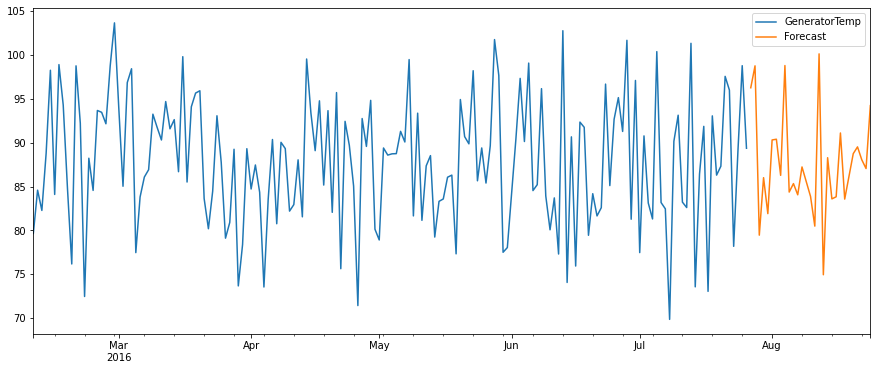

In [40]:
forecast_time = 30
feature_name = 'GeneratorTemp'
df1 = df.drop(['Ambient Air temp','Nacelle Position','Failure'],axis=1)
forecast_df = f.forecast(df1, feature_name, forecast_time)
forecast_df.replace(r'^\s*$', np.nan, regex=True, inplace = True)
forecast_df.plot(figsize=(15, 6))

### Forecasting Nacelle Position for next 30 days

Model AIC:   983.8438857711071


<AxesSubplot:>

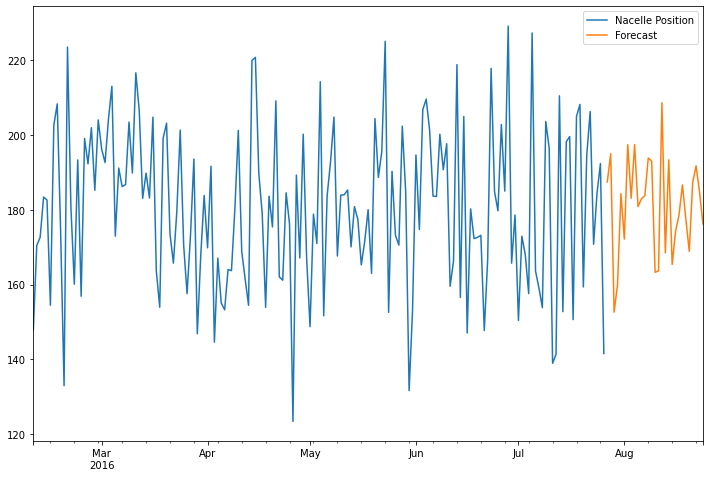

In [16]:
forecast_time = 30
feature_name = 'Nacelle Position'
df1 = df.drop(['GeneratorTemp','Ambient Air temp','Failure'],axis=1)
forecast_df = f.forecast(df1, feature_name, forecast_time)
forecast_df.replace(r'^\s*$', np.nan, regex=True, inplace = True)
forecast_df.plot(figsize=(12, 8))

### Forecasting Ambient Air Temp for next 30 days

Model AIC:   688.4978749187952


<AxesSubplot:>

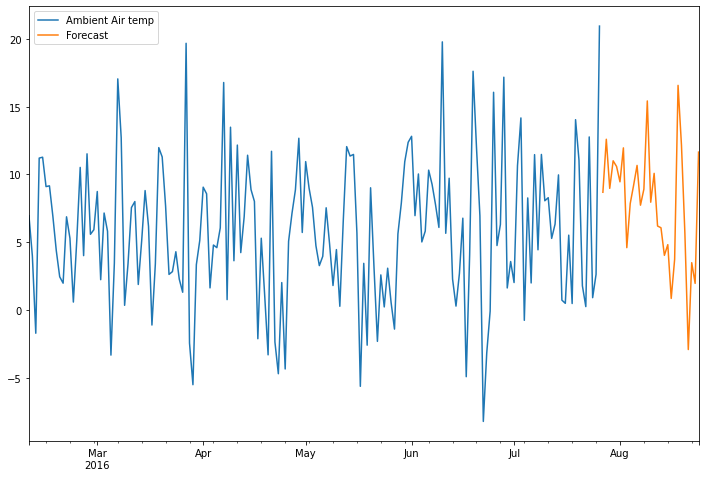

In [17]:
forecast_time = 30
feature_name = 'Ambient Air temp'
df1 = df.drop(['GeneratorTemp','Nacelle Position','Failure'],axis=1)
forecast_df = f.forecast(df1, feature_name, forecast_time)
forecast_df.replace(r'^\s*$', np.nan, regex=True, inplace = True)
forecast_df.plot(figsize=(12, 8))